<a href="https://colab.research.google.com/github/mitishasurana/Moire/blob/main/Moire_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code takes two images and produces a Moire pattern from the convolution of the images that can be decode using another periodic pattern

Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import image
from PIL import Image, ImageEnhance


Uploading files, only png files are accepted, prefereably of same aspect ratio. 

In [ ]:
from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()
pic_paths=uploaded.keys()
pic_paths=list(pic_paths)

Saving 1_copy.png to 1_copy.png
Saving 5.png to 5.png


If you have files in your google colab storage, you can attach the address here.

In [ ]:
#pic_paths=["/content/f1a3fd8f2436b57491548274491250df.png","/content/superman.png"]


Converting color files to grayscale

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

Converting white pixels into transperant pixels 

In [ ]:
def white_to_transparency(image_array):
    
    img=Image.fromarray(image_array)
    x = np.asarray(img.convert('RGBA')).copy()
    x[:, :, 3] = (255 - x[:, :, :3].mean(axis=2)).astype(np.uint8)

    return Image.fromarray(x)

Reading images as matrices and resize images to 1024 x 1024 pixels


In [ ]:
#pic1 = rgb2gray(image.imread(pic_paths[0]))
#pic2 = rgb2gray(image.imread(pic_paths[1]))
#pic_size = np.array([512,512])
#pic1= pic1.resize((512,512))
#pic2= pic2.resize((512,512))

pic1 = Image.open(pic_paths[0]).convert('L')
pic1 = pic1.resize((1024,1024))
pic1.save(pic_paths[0],'png')

pic2 = Image.open(pic_paths[1]).convert('L')
pic2 = pic2.resize((1024,1024))
pic2.save(pic_paths[1],'png')

pic1=np.asarray(pic1)/256
pic2=np.asarray(pic2)/256


In [ ]:
#pic1=np.zeros([256,256])
#pic2=np.zeros([256,256])

Initializing phase function matrices (phi), grating matrices (L)

In [ ]:
image_size=np.array(pic1.shape)
phi1=np.ones(image_size)
phi2=np.ones(image_size)
phi3=np.ones(image_size)
L1=np.zeros(image_size,dtype=np.uint8)
L2=np.zeros(image_size,dtype=np.uint8)
L3=np.zeros(image_size,dtype=np.uint8)


Displaying images

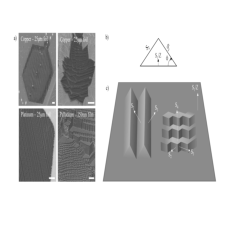

(-0.5, 1023.5, 1023.5, -0.5)

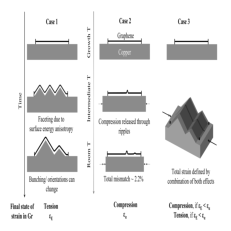

In [ ]:
plt.imshow(pic1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(pic2, cmap='gray')
plt.axis('off')

Creating the phase function

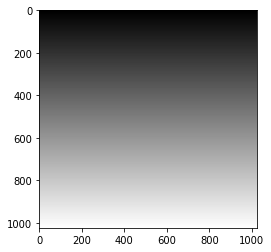

In [ ]:
for i in range (0,image_size[0]):
  phi1[i]=0.275*np.pi*(i+1)
plt.imshow(phi1,cmap='gray')

Applying phase modulation constraint (psi, also referred to as phase shift) to the images
 

In [ ]:
psi1=np.arccos(2*pic1-1)
psi2=np.arccos(2*pic2-1)

In [ ]:
phi2=phi1-psi1
phi3=phi1-psi2

Creating the gratings using a periodic function on the phase function

In [ ]:
for i in range (0,pic1.shape[0]):
  for j in range (0,pic1.shape[0]):
    L1[i,j]=255*(0.5+0.5*np.cos(phi1[i,j]))
    L2[i,j]=255*(0.5+0.5*np.cos(phi2[i,j]))
    L3[j,i]=255*(0.5+0.5*np.cos(phi3[i,j]))

Displaying the gratings

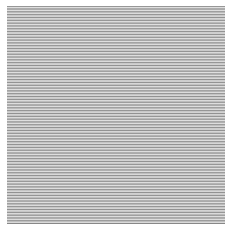

In [ ]:
L1image=white_to_transparency(L1)
plt.imshow(L1image,cmap="gray")
plt.axis('off')
L1image.save("L1.png")
plt.savefig("L1.png",transparent=True,exist_ok=True)
#files.download("L1.png") 


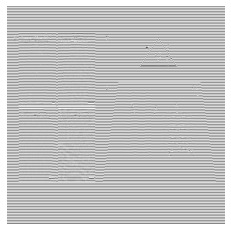

In [ ]:
L2image=white_to_transparency(L2)
L2image.save("L2.png")
plt.imshow(L2image,cmap="gray")
plt.axis('off')
plt.savefig("L2.png",transparent=True,exist_ok=True)
#files.download("L2.png")

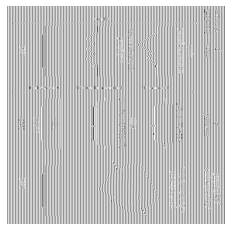

In [ ]:
L3image=white_to_transparency(L3)
L3image.save("L3.png")
plt.imshow(L3image,cmap="gray")
plt.axis('off')
plt.savefig("L3.png",transparent=True,exist_ok=True)
#files.download("L3.png")

Convolving gratings of image 1 and the periodic function using their Fourier transforms and displaying the superposed Moire image 

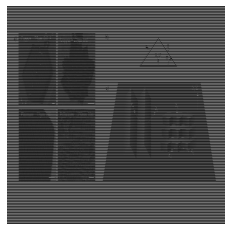

In [ ]:
L1L2=np.fft.fftshift(signal.convolve(np.fft.fftshift(np.fft.fftn(L1)),np.fft.fftshift(np.fft.fftn(L2))))
Moire_1=np.fft.ifft2(L1L2)
plt.imshow(np.abs(Moire_1), cmap='gray')
plt.axis('off')
plt.savefig("Moire_1.png",transparent=True,exist_ok=True)
#files.download("Moire_1.png")


Convolving gratings of image 2 and the periodic function using their Fourier transforms and displaying the superposed Moire image 

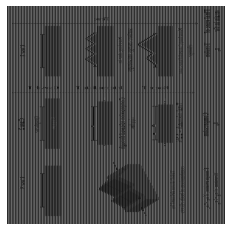

In [ ]:
L1L3=np.fft.fftshift(signal.convolve(np.fft.fftshift(np.fft.fft2(np.transpose(L1))),np.fft.fftshift(np.fft.fft2((L3)))))
Moire_2=np.fft.ifft2(L1L3)
plt.imshow(np.abs(Moire_2), cmap='gray')
plt.axis('off')
plt.savefig("Moire_2.png",transparent=True,exist_ok=True)
#files.download("Moire_2.png")

In [ ]:
def white_to_transparency_gradient(array):
    img=Image.fromarray(array)
    
    x = np.asarray(img.convert('RGBA')).copy()

    #x[:, :, 3] = (255 * (x[:, :, :3] != 255).any(axis=2)).astype(np.uint8)
    x[:, :, 3] = (255 - x[:, :, :3].mean(axis=2)).astype(np.uint8)

    return Image.fromarray(x)

Convolving gratings of phase modulated gratings of the image 1 and image 2 (ith 90 degree rotation) 

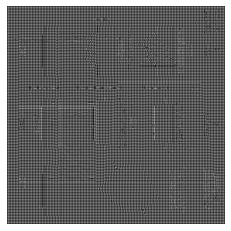

In [ ]:
L2L3=np.fft.fftshift(signal.convolve(np.fft.fftshift(np.fft.fft2((L2))),np.fft.fftshift(np.fft.fft2((L3)))))
Moire_3=(np.fft.ifft2(L2L3))
abs_Moire=np.abs(Moire_3)
abs_Moire = abs_Moire/(abs_Moire.max()/255.0)
L2L3image=white_to_transparency_gradient(abs_Moire)
L2L3image.save("L2L3image.png")
plt.imshow(L2L3image, cmap='gray')
plt.axis('off')
plt.savefig("Moire.png",transparent=True,exist_ok=True)
#files.download("Moire.png")

Now, L1 periodic function + the above grating produces image 1

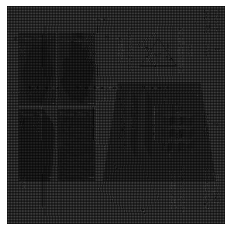

In [ ]:
Mix_1=np.fft.fftshift(signal.convolve(np.fft.fftshift(np.fft.fft2((abs_Moire))),np.fft.fftshift(np.fft.fft2((L1)))))
Moire_4=np.fft.ifft2(Mix_1)
plt.axis('off')
plt.imshow(np.abs(Moire_4), cmap='gray')

And 90 degree rotated L1 periodic function + the above grating produces image 2

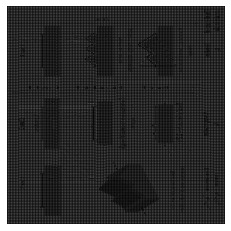

In [ ]:
Mix_2=np.fft.fftshift(signal.convolve(np.fft.fftshift(np.fft.fft2((abs_Moire))),np.fft.fftshift(np.fft.fft2((np.transpose(L1))))))
Moire_5=(np.fft.ifft2(np.fft.ifftshift(Mix_2)))
plt.axis('off')
plt.imshow(np.abs(Moire_5), cmap='gray')

In [ ]:
def Enhance_image (array):
  im = Image.fromarray(np.abs(array))
  im = im.convert("RGB")
  im.save("im.png")
  #image brightness enhancer
  enhancer = ImageEnhance.Contrast(im)
  factor = 3 #increase contrast
  im_output = enhancer.enhance(factor)
  im_output.save('more-contrast-image.png')
  plt.axis('off')
  plt.imshow(np.abs(im_output), cmap='gray')

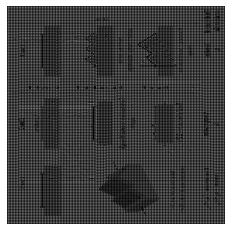

In [ ]:
#Image Enhance

Moire_4_E=255*np.abs(Moire_4)/np.max(np.abs(Moire_4))
Moire_5_E=255*np.abs(Moire_5)/np.max(np.abs(Moire_5))

Enhance_image(Moire_4_E)
Enhance_image(Moire_5_E)